In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
df = pd.read_csv(r'D:\Academy\fourth_year_2nd_semester\lab\AI\lap_codes\problem_03_update\salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [41]:
input = df.drop('salary_more_then_100k', axis='columns')

In [42]:
target = df['salary_more_then_100k']

In [43]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [44]:
from sklearn.preprocessing import LabelEncoder
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

In [45]:
input['company'] = le_company.fit_transform(input['company'])
input['job'] = le_job.fit_transform(input['job'])   
input['degree'] = le_degree.fit_transform(input['degree'])  
input

,company,job,degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [46]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [47]:
model.fit(input, target)

DecisionTreeClassifier(criterion='entropy')

In [48]:
model.score(input, target)

1.0

[Text(0.4166666666666667, 0.9166666666666666, 'company <= 0.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.25, 0.75, 'job <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.33333333333333337, 0.8333333333333333, 'True  '),
 Text(0.16666666666666666, 0.5833333333333334, 'degree <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08333333333333333, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.25, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.5833333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.5833333333333334, 0.75, 'company <= 1.5\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.5, 0.5833333333333334, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.5833333333333334, 'job <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.5833333333333334, 0.4166666666666667, 'entr

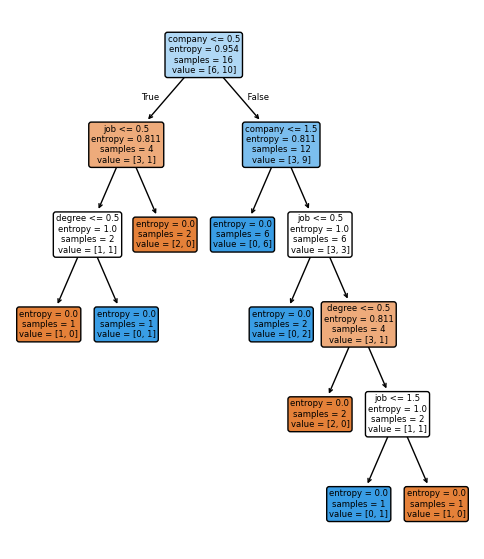

In [49]:
plt.figure(figsize=(6,7))
tree.plot_tree(model, feature_names=input.columns, filled=True, rounded=True )